## European streamflow database

#### The main objective of this script is to start the posterior analysis of the concatenated data for Europe. 

At this part initally the gaps are being analysed to check the amount of data for each threshould, and also the areas. We can check first the number of stations per country with official area information, and start the prognosis about how to proceed with the delineation boundaries for each cachment. 




Written by: Thiago Victor Medeiros do Nascimento


Link to database spreadsheet: https://docs.google.com/spreadsheets/d/1xS1mWGolKbkn2xthTIW6QNHNkPVV6TnwWXLgYqxAozM/edit#gid=0

In [2]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pymannkendall as mk
from plotly.offline import plot
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
import datetime
import tqdm as tqdm
import os
import glob
import calendar
import seaborn as sns

warnings.simplefilter(action='ignore', category=Warning)

In [3]:
%config Completer.use_jedi = False                           # This improve the auto-fill function

import geospatialfunctions as geospatialfunctions            # Geospatialfunctions is a module with useful functions

First we can set our working directory and check it:

In [4]:
path = r"C:\Users\nascimth\Documents\Thiago\Eawag\Python\Datasets"
os.chdir(path)
os.getcwd()

'C:\\Users\\nascimth\\Documents\\Thiago\\Eawag\\Python\\Datasets'

#### Countries currently available: 



1. Austria (AT)
2. Belgium (BE)
3. Belarus (BY)
4. Bosnia and Herzegovina (BA)
5. Croatia (HR)
6. Cyprus (CY)
7. Czechia (CZ)
8. Denmark (DK)
9. Estonia (EE)
10. Finland (FI)
11. France (FR)
12. Germany (DE)
13. Greece (GR) ***
14. Great Britain (GB)
15. Hungary (HU) ***
16. Iceland (IS)
17. Ireland (IE)
18. Italy (IT)
19. Latvia (LV)
20. Lithuania (LT)
21. Luxembourg (LU)
22. Netherlands (NL)
23. Northern Ireland (UK)
24. Norway (NO)
25. Poland (PL)
26. Portugal (PT)
27. Romania (RO)
28. Russia (RU)
29. Serbia (RS)
30. Slovakia (SK)
31. Slovenia (SI)
32. Spain (ES)
33. Sweden (SE)
34. Switzerland (CH)
_____________________________________
35. North Macedonia (MK)
36. Moldova (MD)
37. Ukraine (UA)
38. Turkey (TR)
39. Bulgaria (BG)


*** Countries requested but not yet available from the official website, however available from GRDC.

#### * Network information lecture per country:

In [5]:
timeseries_EU = pd.read_csv(r"EU\timeseries_EU.csv", index_col=0)
timeseries_EU.index = pd.to_datetime(timeseries_EU.index)
timeseries_EU.index.name = "dates"
timeseries_EU

,AT00001,AT00002,AT00003,AT00004,AT00005,AT00006,AT00007,AT00008,AT00009,AT00010,...,TR00027,TR00028,BG00001,BG00002,BG00003,BG00004,BG00005,BG00006,BG00007,BG00008
dates,,,,,,,,,,,,,,,,,,,,,
1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
network_EU = pd.read_excel(r"EU\network_EU.xlsx")
network_EU

,Unnamed: 0,new_code,code,name,river,area,elev,lon,lat,country,degimpact,lake,num_reservoir,RE
0,0,AT00001,200014,Bangs,Rhein,4647.9,420,9.534835,47.273748,AT,s,NaN,NaN,NaN
1,1,AT00002,200048,Schruns (Vonbunweg),Litz,102,673,9.913677,47.080301,AT,l,NaN,NaN,NaN
2,2,AT00003,231662,Loruens-Aeule,Ill,535.2,579,9.847765,47.132821,AT,s,NaN,NaN,NaN
3,3,AT00004,200592,Kloesterle (OEBB),Alfenz,66.6,1014,10.061843,47.128994,AT,s,NaN,NaN,NaN
4,4,AT00005,200097,Buers (Bruecke L82),Alvier,72.2,564,9.802668,47.150770,AT,s,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11463,3,BG00004,6842800,RUSE,DANUBE RIVER,669900,12,25.950000,43.860000,BG,NaN,NaN,NaN,NaN
11464,4,BG00005,6842900,SILISTRA,DANUBE RIVER,689700,7,27.260000,44.130000,BG,NaN,NaN,NaN,NaN
11465,5,BG00006,6864050,MARINO POLE,STRUMA RIVER,10243,NaN,23.350000,41.416668,BG,NaN,NaN,NaN,NaN
11466,6,BG00007,6864800,KHADZHIDIMOVO,NESTOS POTAMOS,2260,NaN,23.869583,41.525002,BG,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='dates'>

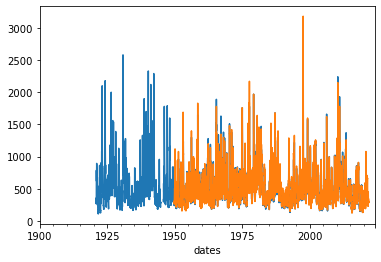

In [10]:
timeseries_EU.loc[:, "DE00327"].plot()
timeseries_EU.loc[:, "PL00005"].plot()

<AxesSubplot:xlabel='dates'>

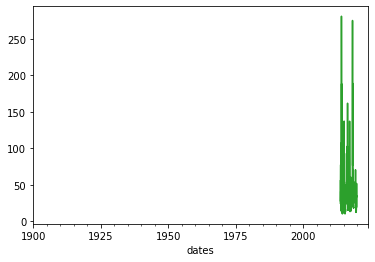

In [15]:
timeseries_EU.loc[:, "ES01302"].plot()
timeseries_EU.loc[:, "ES01299"].plot()
timeseries_EU.loc[:, "ES01252"].plot()

#### * Now we can start our gap analysis:

In [6]:
network_EU.set_index("new_code", inplace = True)


network_EU

,Unnamed: 0,code,name,river,area,elev,lon,lat,country,degimpact,lake,num_reservoir,RE
new_code,,,,,,,,,,,,,
AT00001,0,200014,Bangs,Rhein,4647.9,420,9.534835,47.273748,AT,s,NaN,NaN,NaN
AT00002,1,200048,Schruns (Vonbunweg),Litz,102,673,9.913677,47.080301,AT,l,NaN,NaN,NaN
AT00003,2,231662,Loruens-Aeule,Ill,535.2,579,9.847765,47.132821,AT,s,NaN,NaN,NaN
AT00004,3,200592,Kloesterle (OEBB),Alfenz,66.6,1014,10.061843,47.128994,AT,s,NaN,NaN,NaN
AT00005,4,200097,Buers (Bruecke L82),Alvier,72.2,564,9.802668,47.150770,AT,s,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
BG00004,3,6842800,RUSE,DANUBE RIVER,669900,12,25.950000,43.860000,BG,NaN,NaN,NaN,NaN
BG00005,4,6842900,SILISTRA,DANUBE RIVER,689700,7,27.260000,44.130000,BG,NaN,NaN,NaN,NaN
BG00006,5,6864050,MARINO POLE,STRUMA RIVER,10243,NaN,23.350000,41.416668,BG,NaN,NaN,NaN,NaN


In [7]:
coords = network_EU[["lon", "lat"]].copy()
coords

,lon,lat
new_code,,
AT00001,9.534835,47.273748
AT00002,9.913677,47.080301
AT00003,9.847765,47.132821
AT00004,10.061843,47.128994
AT00005,9.802668,47.150770
...,...,...
BG00004,25.950000,43.860000
BG00005,27.260000,44.130000
BG00006,23.350000,41.416668


In [25]:
summarygapsstations = geospatialfunctions.summarygaps(timeseries_EU.loc["1981":"2020",:], coords)
summarygapsstations

,CoordX,CoordY,NumGaps,PercentageGaps
Code,,,,
AT00001,9.534835,47.273748,5844.0,40.000000
AT00002,9.913677,47.080301,366.0,2.505133
AT00003,9.847765,47.132821,1828.0,12.511978
AT00004,10.061843,47.128994,6576.0,45.010267
AT00005,9.802668,47.150770,3653.0,25.003422
...,...,...,...,...
BG00004,25.950000,43.860000,11688.0,80.000000
BG00005,27.260000,44.130000,11688.0,80.000000
BG00006,23.350000,41.416668,12419.0,85.003422


In [26]:
network_EU["PercentageGaps"] = summarygapsstations["PercentageGaps"]
network_EU

,Unnamed: 0,code,name,river,area,elev,lon,lat,country,degimpact,lake,num_reservoir,RE,PercentageGaps
new_code,,,,,,,,,,,,,,
AT00001,0,200014,Bangs,Rhein,4647.9,420,9.534835,47.273748,AT,s,NaN,NaN,NaN,40.000000
AT00002,1,200048,Schruns (Vonbunweg),Litz,102,673,9.913677,47.080301,AT,l,NaN,NaN,NaN,2.505133
AT00003,2,231662,Loruens-Aeule,Ill,535.2,579,9.847765,47.132821,AT,s,NaN,NaN,NaN,12.511978
AT00004,3,200592,Kloesterle (OEBB),Alfenz,66.6,1014,10.061843,47.128994,AT,s,NaN,NaN,NaN,45.010267
AT00005,4,200097,Buers (Bruecke L82),Alvier,72.2,564,9.802668,47.150770,AT,s,NaN,NaN,NaN,25.003422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BG00004,3,6842800,RUSE,DANUBE RIVER,669900,12,25.950000,43.860000,BG,NaN,NaN,NaN,NaN,80.000000
BG00005,4,6842900,SILISTRA,DANUBE RIVER,689700,7,27.260000,44.130000,BG,NaN,NaN,NaN,NaN,80.000000
BG00006,5,6864050,MARINO POLE,STRUMA RIVER,10243,NaN,23.350000,41.416668,BG,NaN,NaN,NaN,NaN,85.003422


(<Figure size 1080x2160 with 2 Axes>, <AxesSubplot:>)

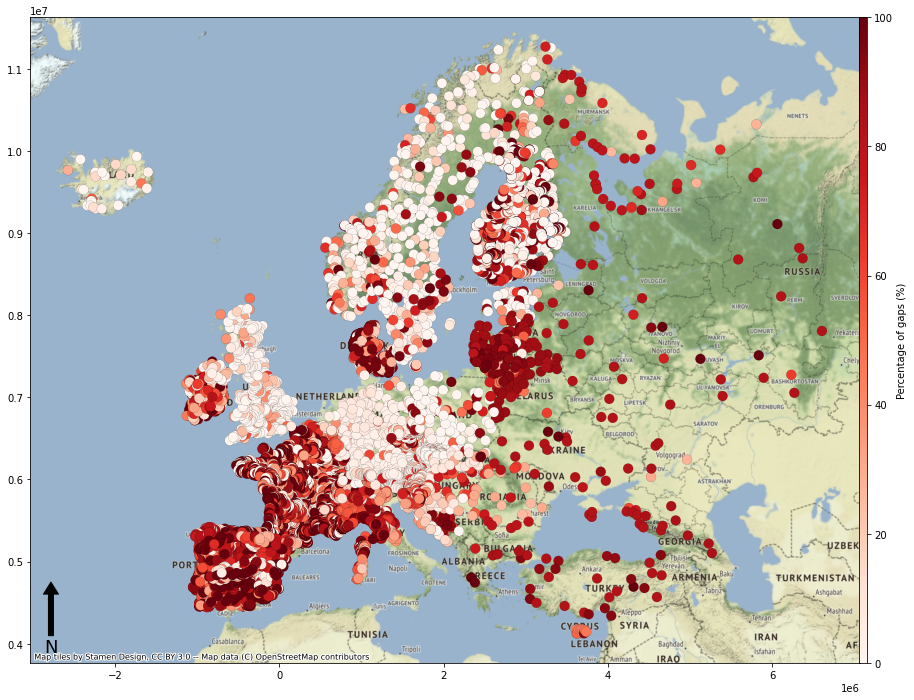

In [10]:
geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations, crsproj = 'epsg:4326', backmapproj = True, 
                             figsizeproj = (15, 30), cmapproj = "Reds", markersize_map = 100)

Now we can check the total of gauges when we set a maximum number of gaps:

(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

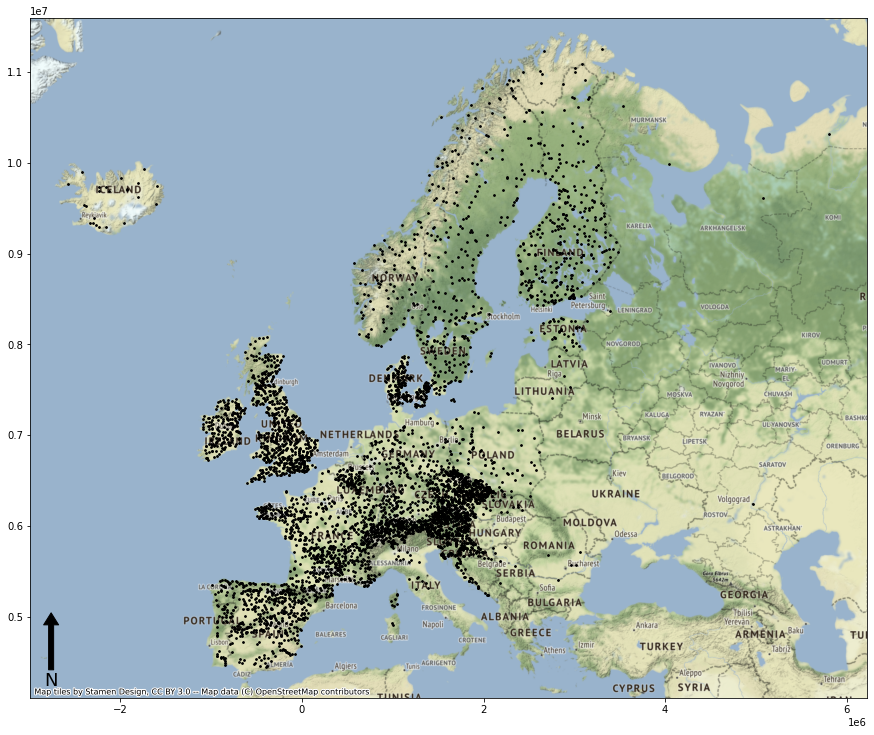

In [11]:
geospatialfunctions.plotpointsmap(summarygapsstations[summarygapsstations.PercentageGaps < 30.0], 
                                  crsproj = 'epsg:4326', showcodes = False)

In [12]:
summarygapsstations[summarygapsstations.PercentageGaps < 30.0]

,CoordX,CoordY,NumGaps,PercentageGaps,geometry
Code,,,,,
AT00002,9.913677,47.080301,366.0,2.505133,POINT (9.91368 47.08030)
AT00003,9.847765,47.132821,1828.0,12.511978,POINT (9.84777 47.13282)
AT00005,9.802668,47.150770,3653.0,25.003422,POINT (9.80267 47.15077)
AT00006,9.875898,47.226658,366.0,2.505133,POINT (9.87590 47.22666)
AT00007,9.678850,47.200301,1827.0,12.505133,POINT (9.67885 47.20030)
...,...,...,...,...,...
CH00278,6.590000,46.330000,3870.0,26.488706,POINT (6.59000 46.33000)
CH00281,6.620000,46.270000,849.0,5.811088,POINT (6.62000 46.27000)
CH00282,6.640000,45.940000,3493.0,23.908282,POINT (6.64000 45.94000)


(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

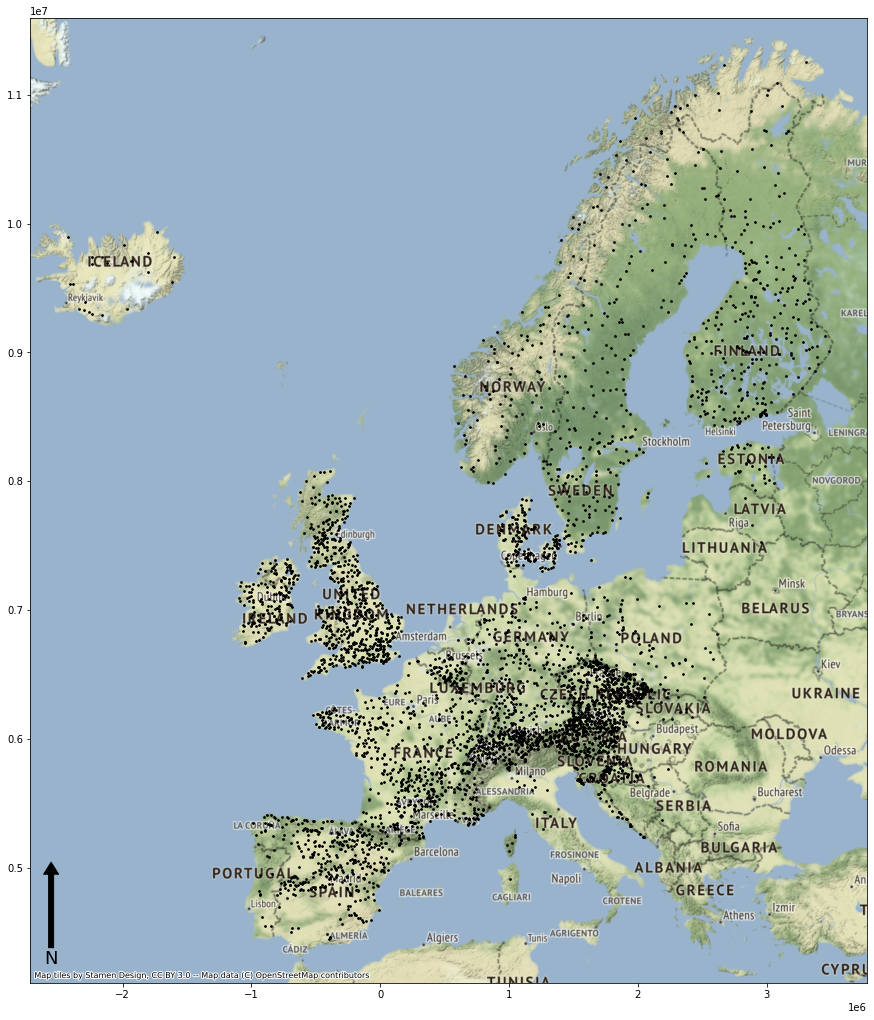

In [13]:
geospatialfunctions.plotpointsmap(summarygapsstations[summarygapsstations.PercentageGaps < 20.0], 
                                  crsproj = 'epsg:4326', showcodes = False)

In [14]:
summarygapsstations[summarygapsstations.PercentageGaps < 20.0]

,CoordX,CoordY,NumGaps,PercentageGaps,geometry
Code,,,,,
AT00002,9.913677,47.080301,366.0,2.505133,POINT (9.91368 47.08030)
AT00003,9.847765,47.132821,1828.0,12.511978,POINT (9.84777 47.13282)
AT00006,9.875898,47.226658,366.0,2.505133,POINT (9.87590 47.22666)
AT00007,9.678850,47.200301,1827.0,12.505133,POINT (9.67885 47.20030)
AT00009,9.578880,47.260362,366.0,2.505133,POINT (9.57888 47.26036)
...,...,...,...,...,...
CH00272,6.420000,45.930000,879.0,6.016427,POINT (6.42000 45.93000)
CH00274,6.460000,46.060000,682.0,4.668036,POINT (6.46000 46.06000)
CH00281,6.620000,46.270000,849.0,5.811088,POINT (6.62000 46.27000)


(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

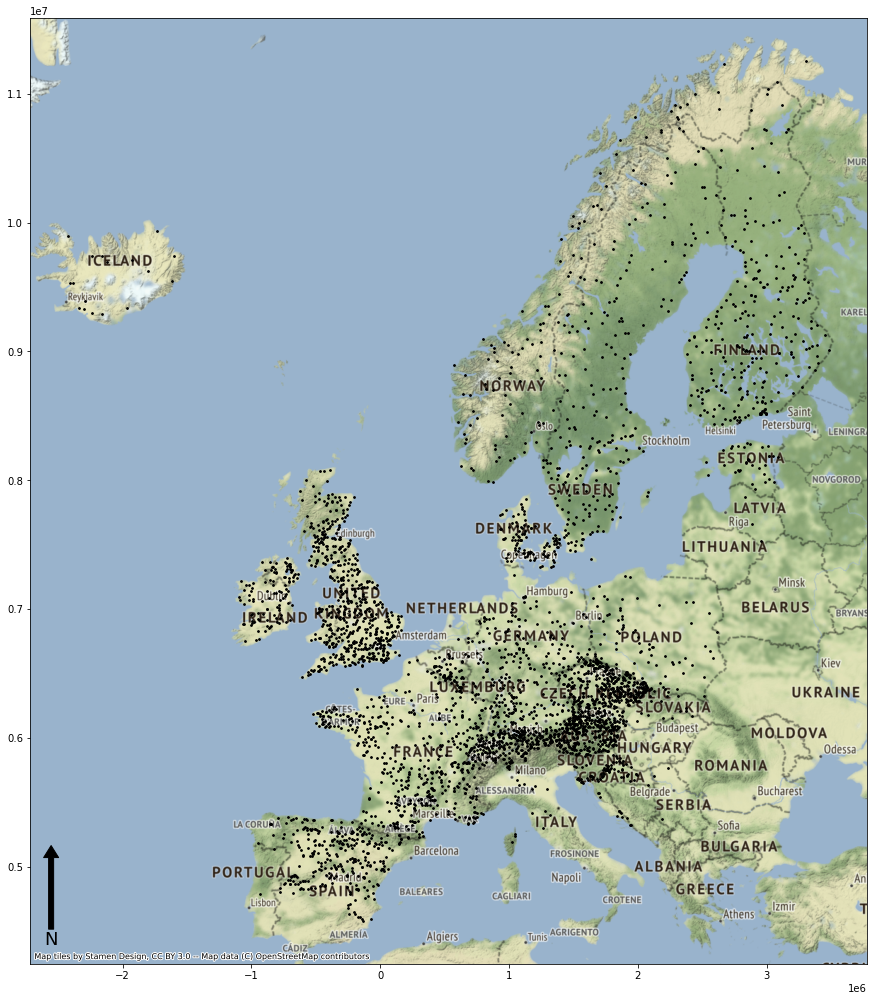

In [15]:
geospatialfunctions.plotpointsmap(summarygapsstations[summarygapsstations.PercentageGaps < 10.0], 
                                  crsproj = 'epsg:4326', showcodes = False)

In [16]:
summarygapsstations[summarygapsstations.PercentageGaps < 10.0]

,CoordX,CoordY,NumGaps,PercentageGaps,geometry
Code,,,,,
AT00002,9.913677,47.080301,366.0,2.505133,POINT (9.91368 47.08030)
AT00006,9.875898,47.226658,366.0,2.505133,POINT (9.87590 47.22666)
AT00009,9.578880,47.260362,366.0,2.505133,POINT (9.57888 47.26036)
AT00010,9.728853,47.256933,368.0,2.518823,POINT (9.72885 47.25693)
AT00013,9.662666,47.451644,366.0,2.505133,POINT (9.66267 47.45164)
...,...,...,...,...,...
CH00270,6.380000,46.330000,587.0,4.017796,POINT (6.38000 46.33000)
CH00272,6.420000,45.930000,879.0,6.016427,POINT (6.42000 45.93000)
CH00274,6.460000,46.060000,682.0,4.668036,POINT (6.46000 46.06000)


In [17]:
network_EU

,Unnamed: 0,code,name,river,area,elev,lon,lat,country,degimpact,lake,num_reservoir,RE,PercentageGaps
new_code,,,,,,,,,,,,,,
AT00001,0,200014,Bangs,Rhein,4647.9,420,9.534835,47.273748,AT,s,NaN,NaN,NaN,40.000000
AT00002,1,200048,Schruns (Vonbunweg),Litz,102,673,9.913677,47.080301,AT,l,NaN,NaN,NaN,2.505133
AT00003,2,231662,Loruens-Aeule,Ill,535.2,579,9.847765,47.132821,AT,s,NaN,NaN,NaN,12.511978
AT00004,3,200592,Kloesterle (OEBB),Alfenz,66.6,1014,10.061843,47.128994,AT,s,NaN,NaN,NaN,45.010267
AT00005,4,200097,Buers (Bruecke L82),Alvier,72.2,564,9.802668,47.150770,AT,s,NaN,NaN,NaN,25.003422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BG00004,3,6842800,RUSE,DANUBE RIVER,669900,12,25.950000,43.860000,TR,NaN,NaN,NaN,NaN,80.000000
BG00005,4,6842900,SILISTRA,DANUBE RIVER,689700,7,27.260000,44.130000,TR,NaN,NaN,NaN,NaN,80.000000
BG00006,5,6864050,MARINO POLE,STRUMA RIVER,10243,NaN,23.350000,41.416668,TR,NaN,NaN,NaN,NaN,85.003422


#### * Here we can check for the number of stations at each country without information regarding the area and level:

In [27]:
stationsdescribe =pd.DataFrame()
stationsdescribe["no_stations"] = network_EU.loc[:,["lon", "country"]].groupby(by=["country"]).count()
stationsdescribe["no_areas"] = network_EU.loc[:,["area", "country"]].groupby(by=["country"]).count()
stationsdescribe["no_levels"] = network_EU.loc[:,["elev", "country"]].groupby(by=["country"]).count()

stationsdescribe

,no_stations,no_areas,no_levels
country,,,
AT,599,599,599
BA,91,49,91
BE,168,144,0
BG,8,8,5
BY,51,48,2
CH,298,298,298
CY,14,14,14
CZ,538,536,0
DE,336,335,332


In [34]:
stationsdescribe.no_stations.sum() - stationsdescribe.no_areas.sum()

2004